In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import wrangle

# Acquire

In [2]:
df = pd.read_csv('service_calls.csv')

In [3]:
df.shape

(495440, 17)

# Prepare

In [4]:
df = wrangle.clean_311(df)
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,...,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",...,0,0,0.086,67656,78203,1,2017,4,19055,59.81
552,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",...,0,0,0.078,66370,78242,1,2017,4,18500,65.21
553,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",...,0,0,0.086,67656,78202,2,2017,5,19055,59.81
554,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",...,0,0,0.148,68081,78207,2,2017,5,23967,26.00
555,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",...,0,0,0.124,80007,78251,2,2017,9,23437,38.44


In [5]:
df.shape

(356804, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356804 non-null  datetime64[ns]
 1   due_date                  356804 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   356804 non-null  object        
 4   dept                      356804 non-null  object        
 5   call_reason               356804 non-null  object        
 6   case_type                 356804 non-null  object        
 7   case_status               356804 non-null  object        
 8   source_id                 356804 non-null  object        
 9   address                   356804 non-null  object        
 10  council_district          356804 non-null  int64         
 11  longitude                 356804 non-null  float64       
 12  

In [7]:
df[["pct_time_of_used", "level_of_delay"]].sample(10)

,pct_time_of_used,level_of_delay
186402,0.043478,Very Early Response
173619,0.115942,Very Early Response
209809,0.250000,Very Early Response
298252,1.000000,Late Response
145372,0.666667,Early Response
31734,0.545455,Early Response
131259,1.000000,Late Response
127593,0.500000,Early Response
310653,0.333333,Very Early Response
293382,0.428571,Very Early Response


In [8]:
df.dropna(subset=['closed_date'], how='all', inplace=True)

In [9]:
def dummy_dept(df):
    # dummy dept feature
    dummy_df =  pd.get_dummies(df['dept'])
    # Name the new columns
    dummy_df.columns = ['animal_care_services', 'code_enforcement_services', 
                        'customer_services', 'development_services', 
                        'metro_health', 'parks_and_rec',
                        'solid_waste_management', 'trans_and_cap_improvements', 
                        'unknown_dept']
    # add the dummies to the data frame
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [10]:
df = dummy_dept(df)

In [11]:
def dummy_call_reason(df):
    # dummy dept feature
    dummy_df =  pd.get_dummies(df['call_reason'])
    # Name the new columns
    dummy_df.columns = ['buildings', 'business', 'cleanup', 'code',
                        'customer_service', 'field', 'land',
                        'license', 'misc', 'storm', 'streets', 'trades', 
                        'traffic', 'waste']
    # add the dummies to the data frame
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [12]:
df = dummy_call_reason(df)

In [13]:
def make_source_id_dummies(df):
    '''This function takes in the cleaned dataframe, makes dummy variables of the source id column, readds the names of the
    dummy columns and returns the concatenated dummy dataframe to the original dataframe.'''
    #make dummies
    dummy_df = pd.get_dummies(df['source_id'])
    #add back column names
    dummy_df.columns = ['web_portal', '311_mobile_app', 'constituent_call', 'internal_services_requests']
    # concatenate dummies to the cleaned data frame
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [14]:
df = make_source_id_dummies(df)

In [15]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df, stratify_by= None)

___

# Start Exploring

___

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay (Target)
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

## Univariate

#### Council District

<AxesSubplot:xlabel='council_district', ylabel='count'>

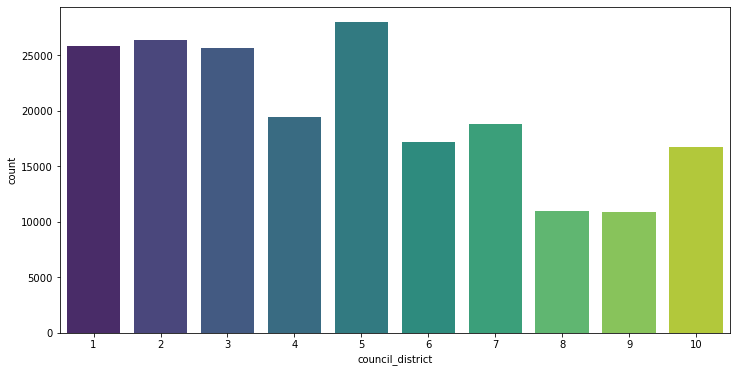

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.council_district, palette='viridis')

### Takwaways:
- Districts 1, 2, 3, & 5 have higher reports
- 4, 6, 7, & 10 still have many reports but not as much as 1, 2, 3, and 5
- Districts 8 and 9 have significantly lower amount of cases compared to other districts

___

## Bivariate

# Number of days open on average in each council district

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

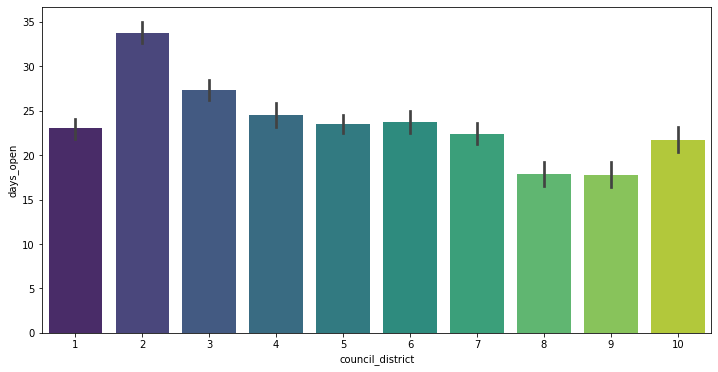

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x=train.council_district, y='days_open', palette='viridis')

### Takeaways:
- District 2 tends to have the most amount of number of days open on average
- Districts 8 and 9 have the least.

___

### Council District and Level of Delay

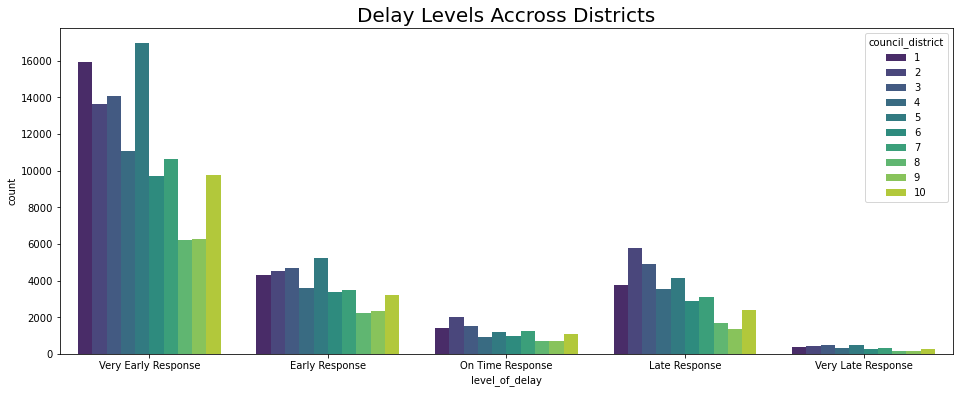

In [18]:
def plot_response_by_district(train):
    '''This visual shows the number of cases in each level of
    response time in each council district'''
    # Set figure size
    plt.figure(figsize=(16,6))
    # set title of plot
    plt.title("Delay Levels Accross Districts", size=20, color='black')
    # rename x-axis so it isnt level_of_delay
    plt.xlabel("Level Of Response Time")
    # rename y-axis so it is not count
    plt.ylabel('Number of Cases')
    # create the visual (palette subject to change)
    sns.countplot(x='level_of_delay', hue='council_district', data=train,
                   palette='viridis')
    # show just the plot
    plt.show()
    
plot_response_by_district(train)

<AxesSubplot:title={'center':'Delay Levels Accross Districts'}, xlabel='council_district', ylabel='count'>

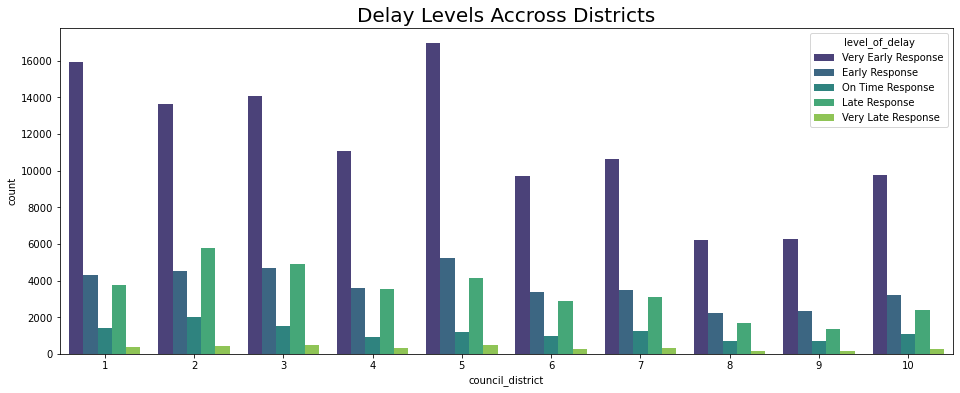

In [19]:
plt.figure(figsize=(16,6))
plt.title("Delay Levels Accross Districts", size=20, color='black')
sns.countplot(hue='level_of_delay', x='council_district', data=train,
               palette='viridis')

### Takeaways:
- We can see a downward trend for each district as the level of delay gets later and later.
- There is a spike in late responses for each district, but not a huge one.
- Very early responses are far more common than any other level of delay

___

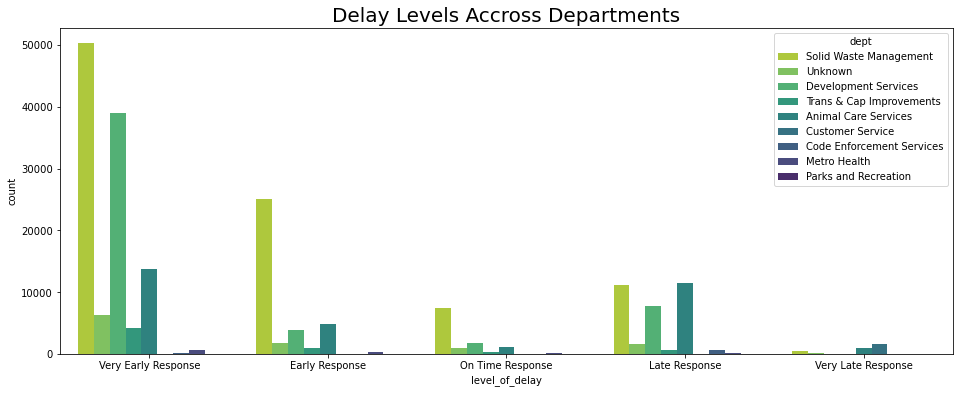

In [20]:
def plot_response_by_dept(train):
    '''This visual shows the number of cases in each
    level of delay by department'''
    # set figure size
    plt.figure(figsize=(16,6))
    # make the title of the visual
    plt.title("Delay Levels Accross Departments", size=20, color='black')
    # rename x-axis so it is not level_of_delay
    plt.xlabel('Level Of Response Time')
    # rename y-axis so it is not count
    plt.ylabel('Number of Cases')
    # make the visual itself (palette subject to change)
    sns.countplot(x='level_of_delay', hue='dept', data=train,
                   palette='viridis_r')
    # just show the visual
    plt.show()
    
plot_response_by_dept(train)

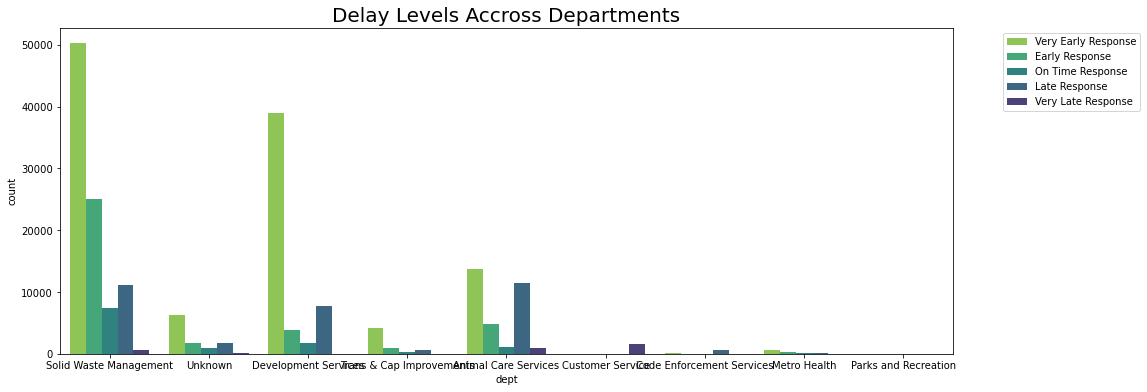

In [21]:
plt.figure(figsize=(16,6))
plt.title("Delay Levels Accross Departments", size=20, color='black')
sns.countplot(hue='level_of_delay', x='dept', data=train,
               palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Takeaways:
- Solid Waste managemnt and development services seen to be the high contributers to very early response times.
    - This is probably because they are recieve a lot of cases.
- Meanwhile trans and cap, code, metro, customer service and parks are much lower.
    - We decided not to further use parks and recreation in our exploration because it only has 3 cases
- custome service seems to have a spike in very late respse and extremely late responses.
    - And is barely seen throughout any of the other level of delays

___

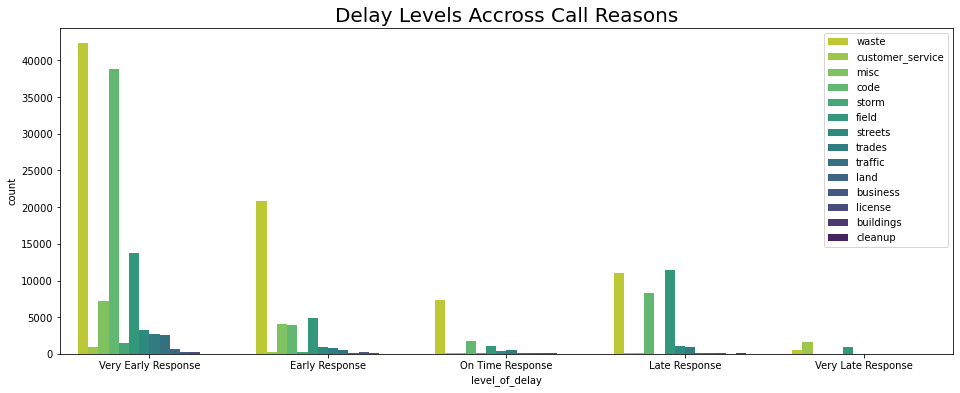

In [22]:
def plot_response_by_reason(train):
    '''This visual shows the number of cases for each delay level
    by the reason for the case being made'''
    # set figure size
    plt.figure(figsize=(16,6))
    # set the titke
    plt.title("Delay Levels Accross Call Reasons", size=20, color='black')
    # rename x-axis so it is not level_of_delay
    plt.xlabel('Level of Response Time')
    # rename y-axis so it is not just count
    plt.ylabel('Number of Cases')
    # make the visual (palette subject to change)
    sns.countplot(x='level_of_delay', hue='call_reason', data=train,
                   palette='viridis_r')
    
    plt.legend(loc='upper right')
    # just show the visual
    plt.show() 
    
plot_response_by_reason(train)

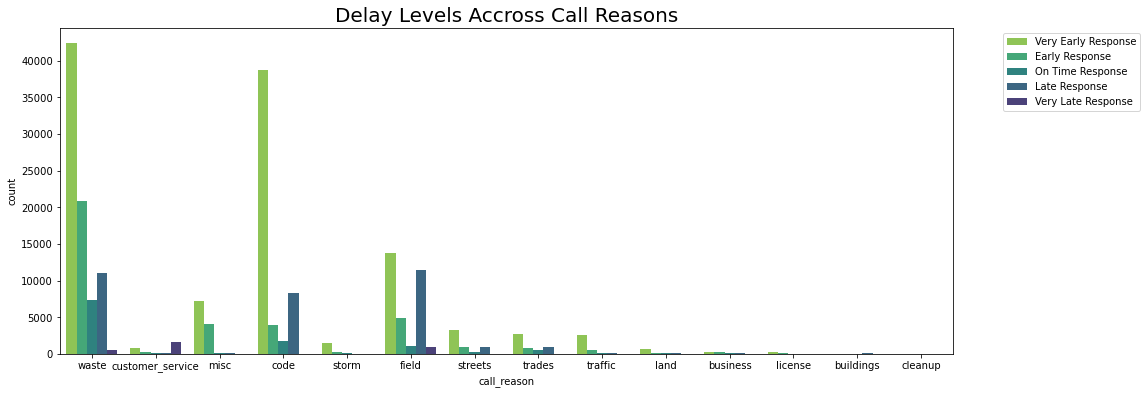

In [23]:
plt.figure(figsize=(16,6))
plt.title("Delay Levels Accross Call Reasons", size=20, color='black')
sns.countplot(hue='level_of_delay', x='call_reason', data=train,
               palette='viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

## Takeaways:
- There is a spike for field and customer service calls in the very late delay level.
- There is a jump in code call reasons in the late delay level. 


___

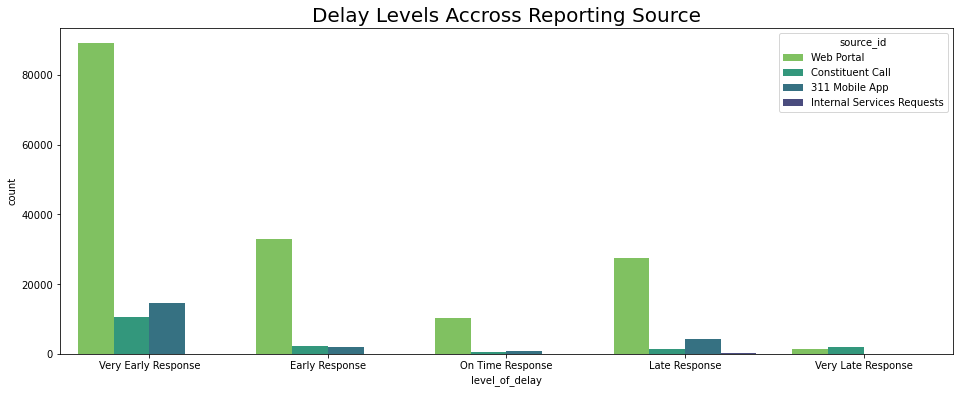

In [24]:

    # set figure size
plt.figure(figsize=(16,6))
# set the titke
plt.title("Delay Levels Accross Reporting Source", size=20, color='black')
# rename x-axis so it is not level_of_delay
plt.xlabel('Level of Response Time')
# rename y-axis so it is not just count
plt.ylabel('Number of Cases')
# make the visual (palette subject to change)
sns.countplot(x='level_of_delay', hue='source_id', data=train,
               palette='viridis_r')
# just show the visual
plt.show()

___

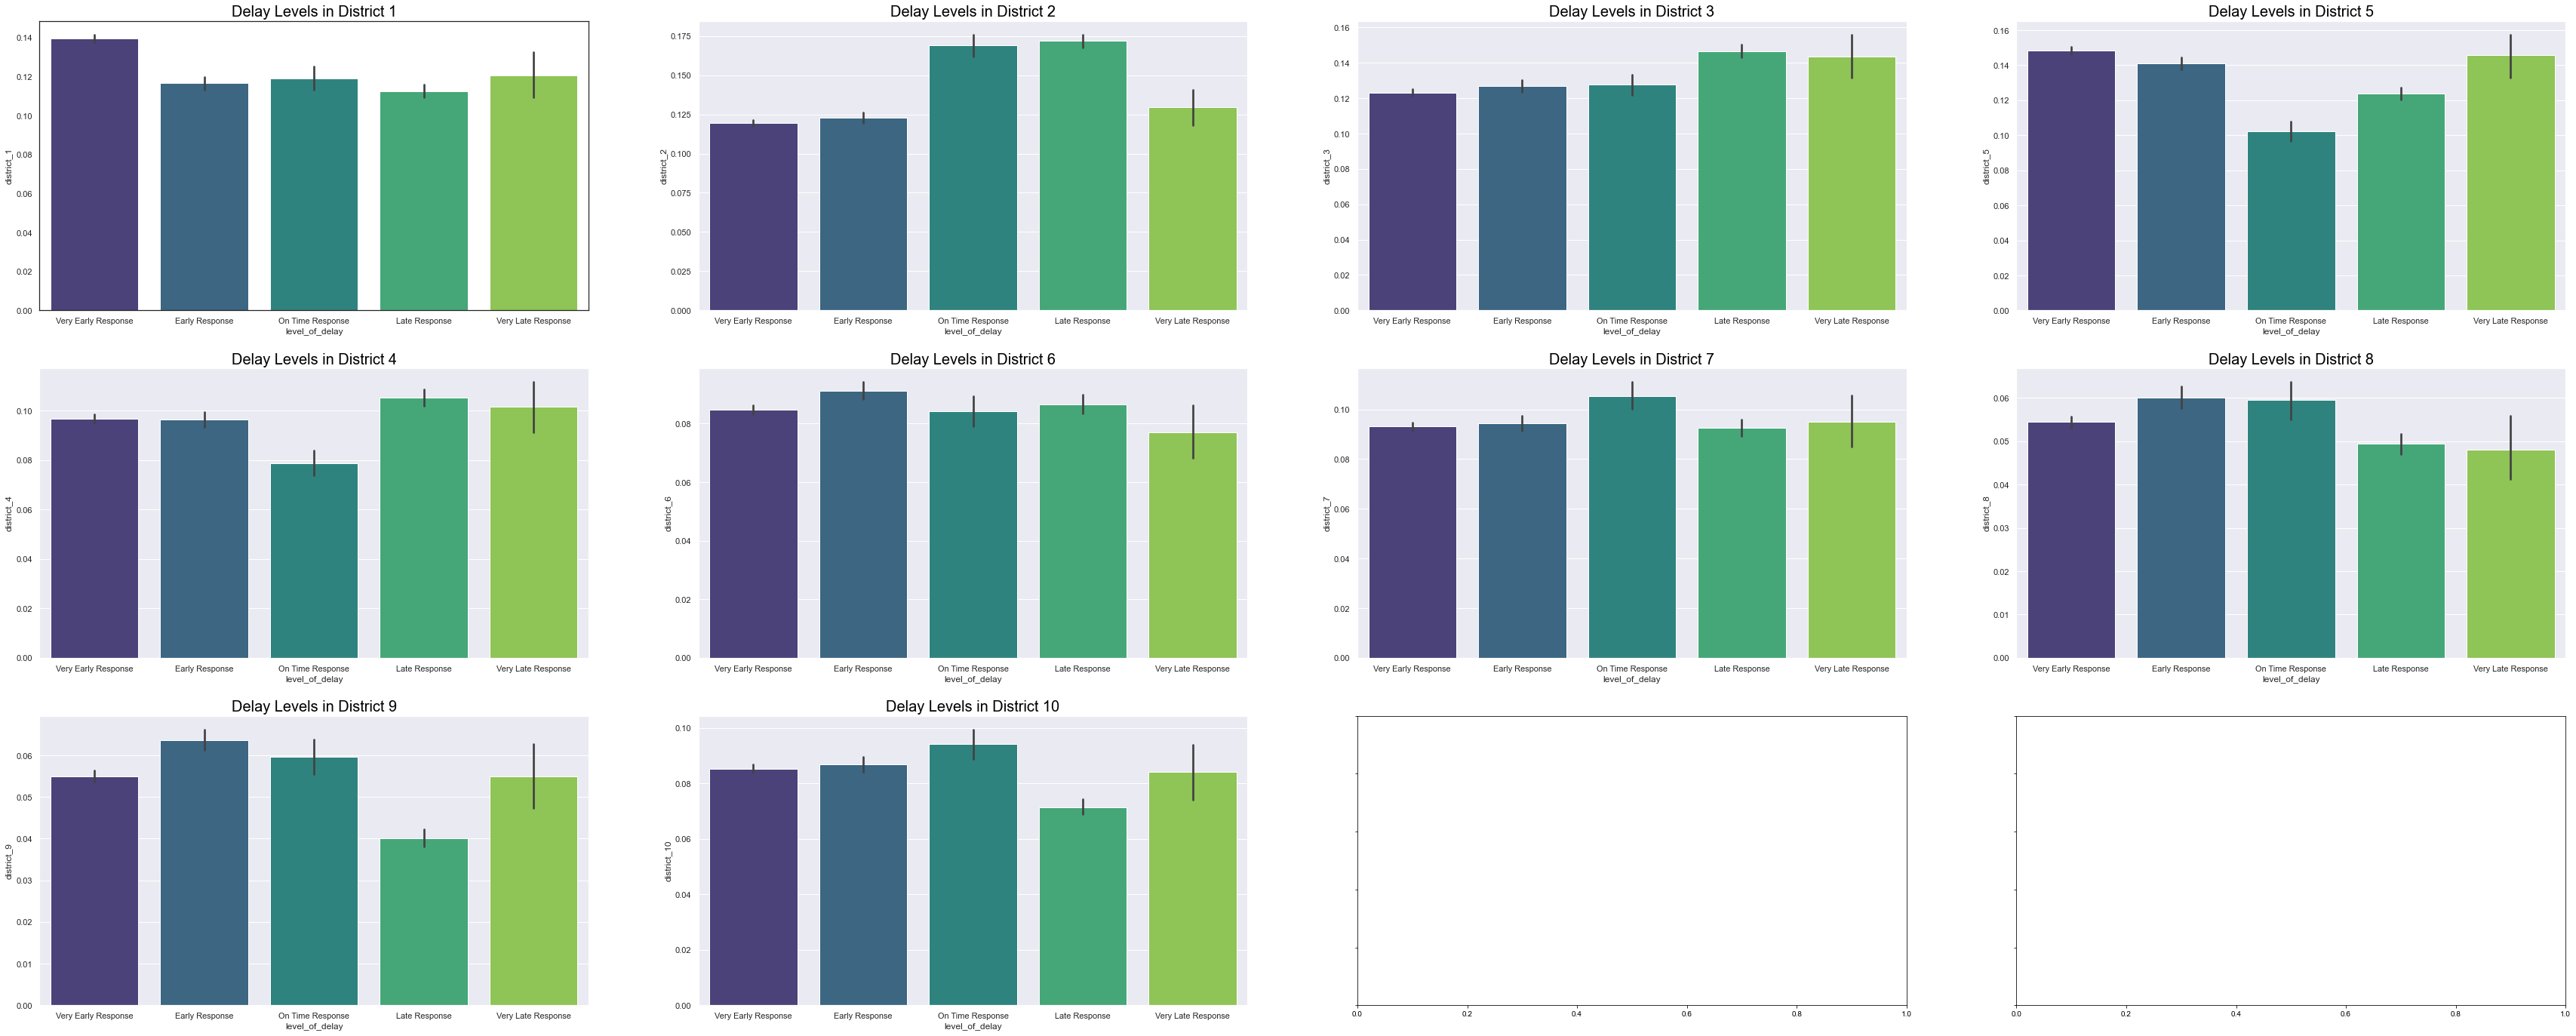

In [25]:
plt.subplots(3, 4, figsize=(60,24), sharey=True)
sns.set(style="white")

plt.subplot(3,4,1)
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_1', data=train,
               palette='viridis')

plt.subplot(3,4,2)
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_2', data=train,
               palette='viridis')

plt.subplot(3,4,3)
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_3', data=train,
               palette='viridis')

plt.subplot(3,4,5)
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_4', data=train,
               palette='viridis')

plt.subplot(3,4,4)
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_5', data=train,
               palette='viridis')

plt.subplot(3,4,6)
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_6', data=train,
               palette='viridis')

plt.subplot(3,4,7)
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_7', data=train,
               palette='viridis')

plt.subplot(3,4,8)
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_8', data=train,
               palette='viridis')

plt.subplot(3,4,9)
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_9', data=train,
               palette='viridis')

plt.subplot(3,4,10)
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_10', data=train,
               palette='viridis')

plt.show()

### Takeaways:
- District 1
    - Makes up for ~ 13.7% of all extremely late responses
    - Makes up for ~ 14% of all extremely early responses
        - North of downtown
        - north downtown
- District 2
    - makes up for nearly 19.7% of all late responses
- District 3
    - this is the south east side of san antonio
- District 4
    - this is the south west side of san antonio
- District 5
    - Made up of:
        - West of downtown SA
        - South downtown area
- District 6
    - This is the west side of San antonio
- District 7
    - 
- District 8
    - Castle hills, Anaqua Springs Ranch, dominion, and Bently Manor are located in this district
        - Luxury neighborhoods
- District 9
    - location of hill country villiage
        - Luxury neighborhood
- District 10
    - the north west side of SA

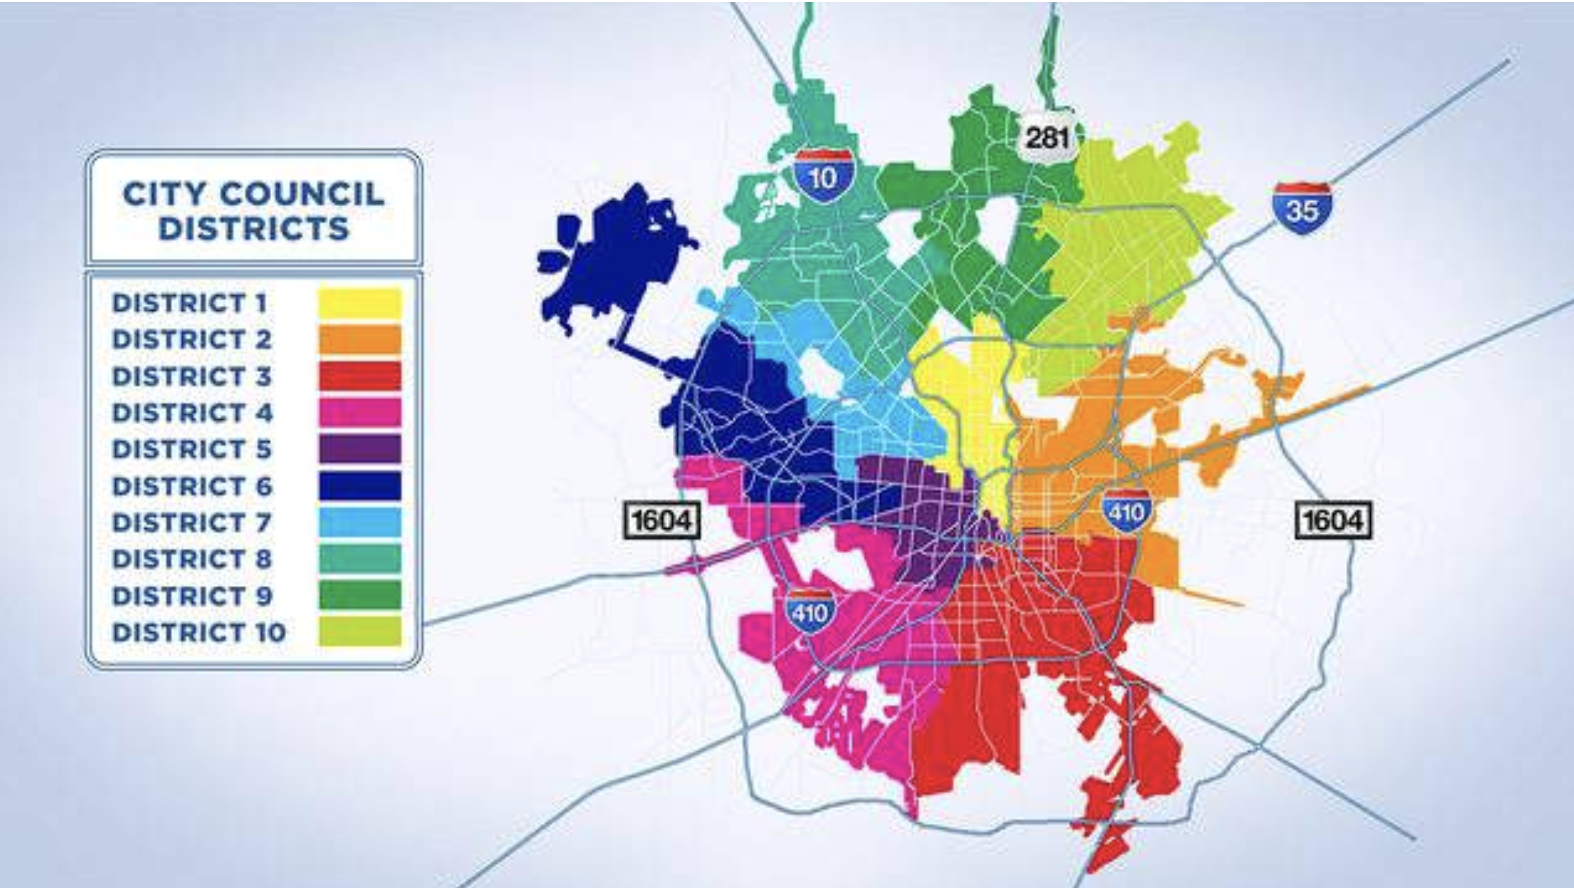

___

## Is the average number of calls in an area affect the response time?

In [26]:
def create_district_train(train):
    '''
    This function takes in the original dataframe and returns
    a dataframe with the quantitative variables averaged by district
    for easier exploration
    '''
    # Creating a dataframe with zipcode and a "days_open" averaged column
    district_train = pd.DataFrame(df.groupby('council_district').days_open.mean()).reset_index()
    # Adding a "days_before_or_after_due" averaged column
    district_train['days_before_or_after_due_mean'] = pd.DataFrame(df.groupby('council_district').days_before_or_after_due.mean()).reset_index()['days_before_or_after_due']
    # Adding a "resolution_days_due" averaged column
    district_train['resolution_days_due_mean'] = pd.DataFrame(df.groupby('council_district').resolution_days_due.mean()).reset_index()['resolution_days_due']
    # Adding a "days_open" median column
    district_train['days_open_med'] = pd.DataFrame(df.groupby('council_district').days_open.median()).reset_index()['days_open']
    # Adding a "days_before_or_after_due" median column
    district_train['days_before_or_after_due_med'] = pd.DataFrame(df.groupby('council_district').days_before_or_after_due.median()).reset_index()['days_before_or_after_due']
    # Adding a "resolution_days_due" median column
    district_train['resolution_days_due_med'] = pd.DataFrame(df.groupby('council_district').resolution_days_due.median()).reset_index()['resolution_days_due']
    return district_train

In [27]:
district_train = create_district_train(train)
district_train

,council_district,days_open,days_before_or_after_due_mean,resolution_days_due_mean,days_open_med,days_before_or_after_due_med,resolution_days_due_med
0,1,22.720181,15.894930,38.615111,3.0,5.0,9
1,2,34.008712,2.149398,36.158110,4.0,4.0,9
2,3,27.245588,6.154547,33.400135,3.0,4.0,8
3,4,24.133230,3.425029,27.558259,2.0,4.0,8
4,5,23.473863,12.404528,35.878390,2.0,5.0,8
5,6,24.129497,5.990039,30.119536,3.0,5.0,8
6,7,22.636981,9.747321,32.384302,3.0,5.0,8
7,8,18.424197,11.436199,29.860396,3.0,5.0,8
8,9,17.935269,6.312798,24.248067,3.0,4.0,8
9,10,21.591040,7.428804,29.019844,3.0,5.0,8


<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due_mean'>

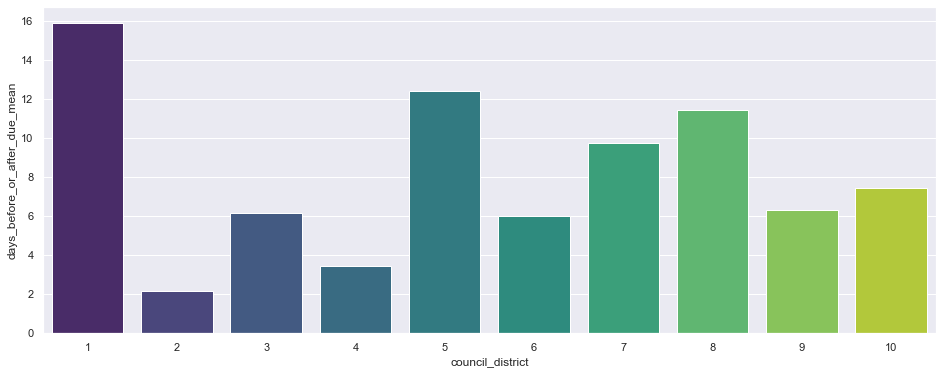

In [28]:
plt.figure(figsize=(16,6))
sns.barplot(data = district_train, x = 'council_district', y = 'days_before_or_after_due_mean', palette = "viridis")

## Takeaways:
- It seems as though council district 2 on average has the slowest 3-1-1 call response time
- While Distrcit 1 has the fastest averge response time
- Districts 0, 7, and 8 have around the same average ranging between 12.5 nd 15.0 days

## Days open and resolution days 

In [29]:
df.dept.value_counts()

Solid Waste Management       168809
Development Services          93548
Animal Care Services          57238
Unknown                       19403
Trans & Cap Improvements      10965
Customer Service               2784
Metro Health                   2356
Code Enforcement Services      1699
Parks and Recreation              2
Name: dept, dtype: int64

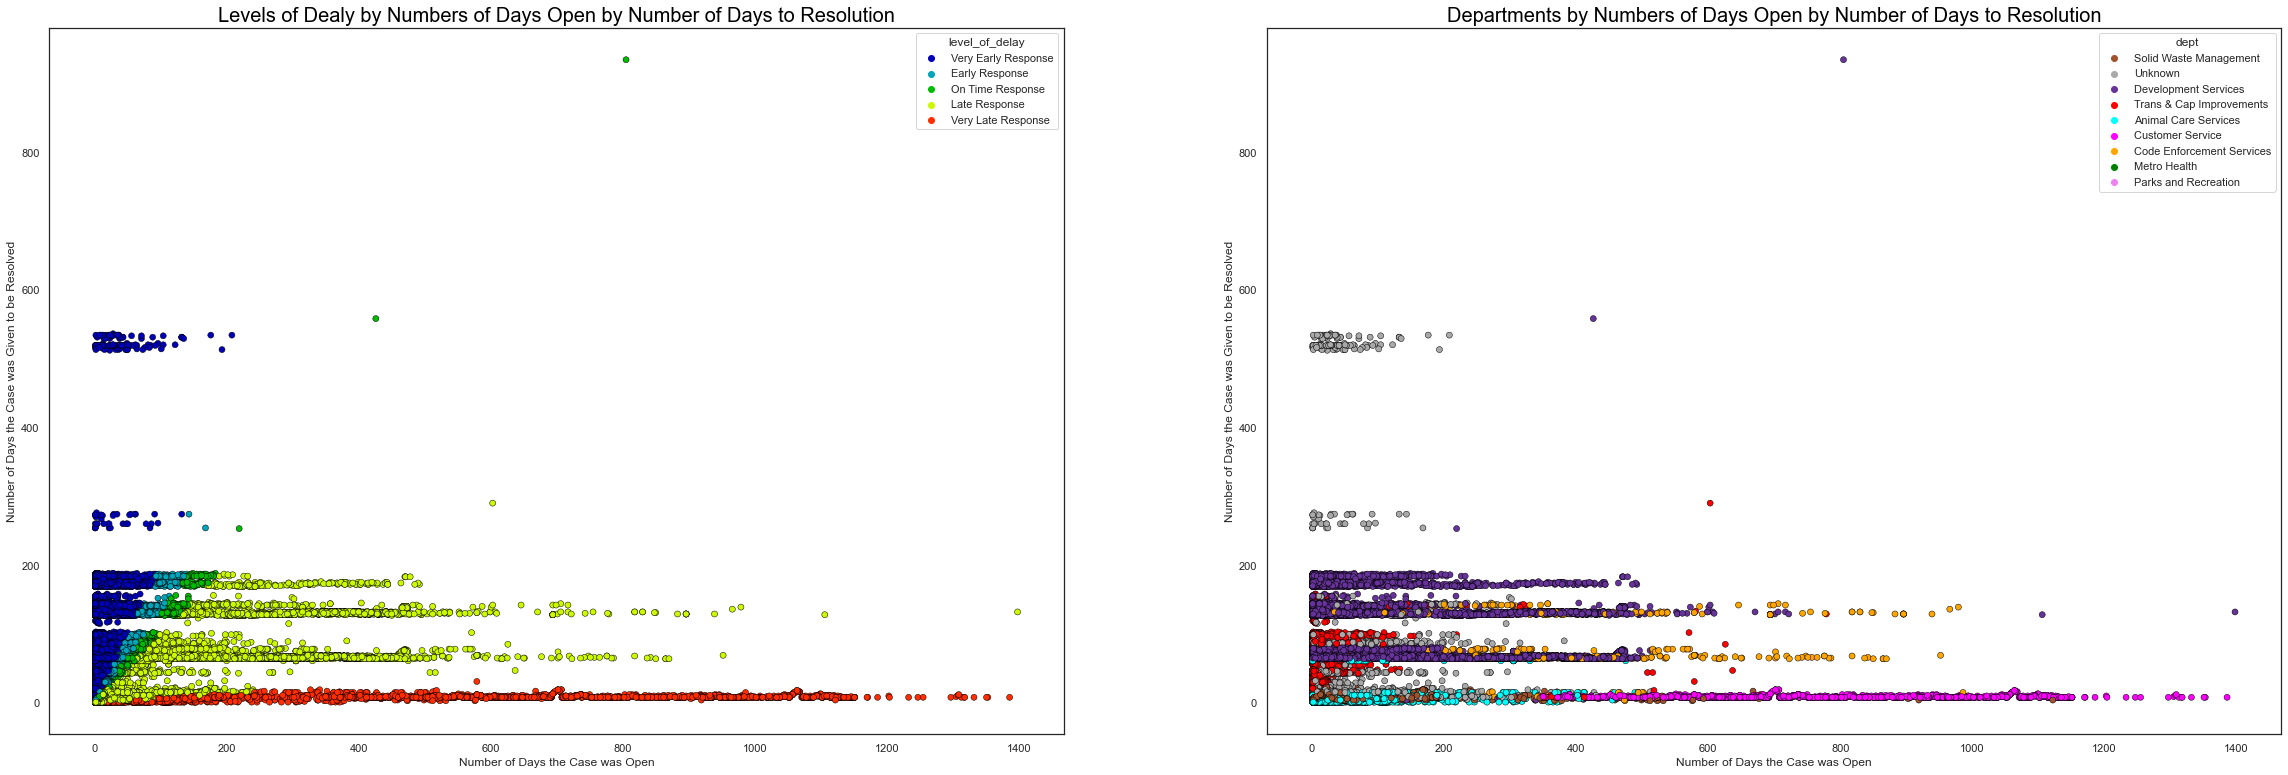

In [30]:
def plot_open_vs_resolve(train):
    '''creates 2 different plots
    1 plot will reflect level of delay by days open and days till resolution
    other plot will reflect department by days open and days till resolution'''
    # set subplot and its size
    plt.subplots(1, 2, figsize=(40,13), sharey=True)
    # set grid color
    sns.set(style="white")
    # create custom color palette for second plot
    dept_colors = ['sienna', 'darkgray', 'rebeccapurple',
                   'red', 'aqua', 'fuchsia', 'orange', 'green', 
                   'violet']
    # put first plot in its position for subplotting
    plt.subplot(1,2,1)
    # make the title
    plt.title("Levels of Dealy by Numbers of Days Open by Number of Days to Resolution", size=20, color='black')
    # name the x axis
    plt.xlabel('Number of Days the Case was Open')
    # name the y axis
    plt.ylabel('Number of Days the Case was Given to be Resolved')
    # create the plot
    sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='nipy_spectral',
                    hue='level_of_delay', edgecolor='black')
    # put second plot in its position within subplot
    plt.subplot(1,2,2)
    # set the title
    plt.title("Departments by Numbers of Days Open by Number of Days to Resolution", size=20, color='black')
    # set x axis name
    plt.xlabel('Number of Days the Case was Open')
    # set y axis name
    plt.ylabel('Number of Days the Case was Given to be Resolved')
    # create plot
    sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette=dept_colors,
                    hue='dept', edgecolor='black')

plot_open_vs_resolve(train)

## Takeaways:
- It seems that a majority of the "Very Late" responses are given minimal number of days (usually 0) to be completed
    - When compared to the second plot we can see a large portion of these are made by the "Customer Service" department followed by "Animal Services".
        - Animal services and Customer Serviceshould be investigated to see why so many cases are given 0 days to complete but can take months upon months to actually close.

___

[(-1.0, 5.0)]

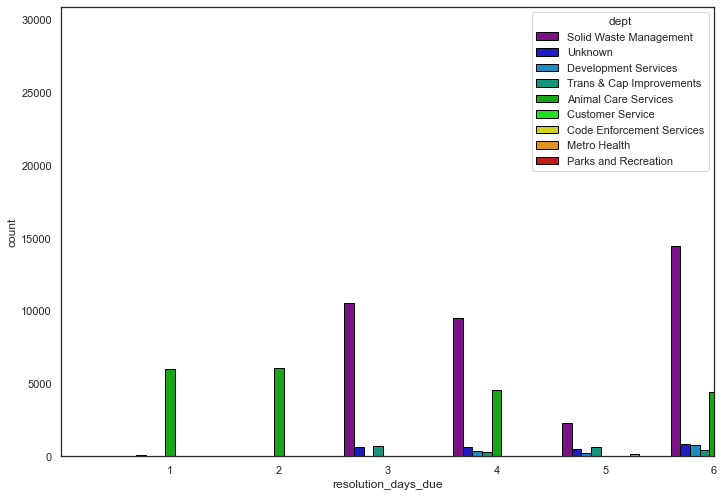

In [31]:
plot = sns.countplot(data=train, x='resolution_days_due', palette='nipy_spectral',
                hue='dept', edgecolor='black')
plot.set(xlim=(-1, 5))

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

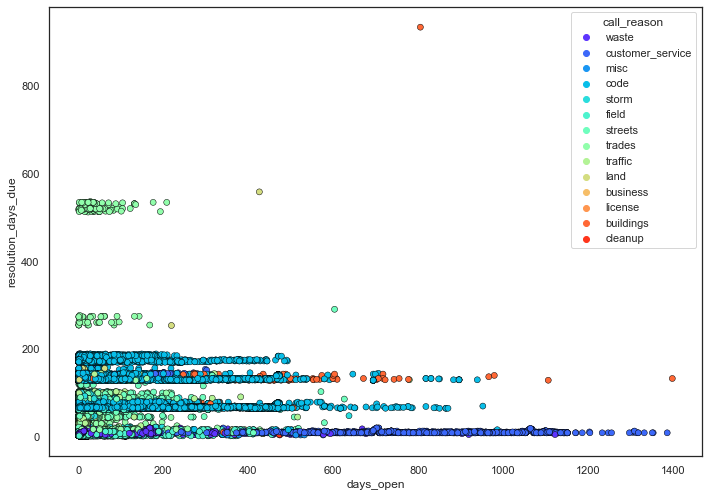

In [32]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='rainbow', edgecolor='black',
                hue='call_reason')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

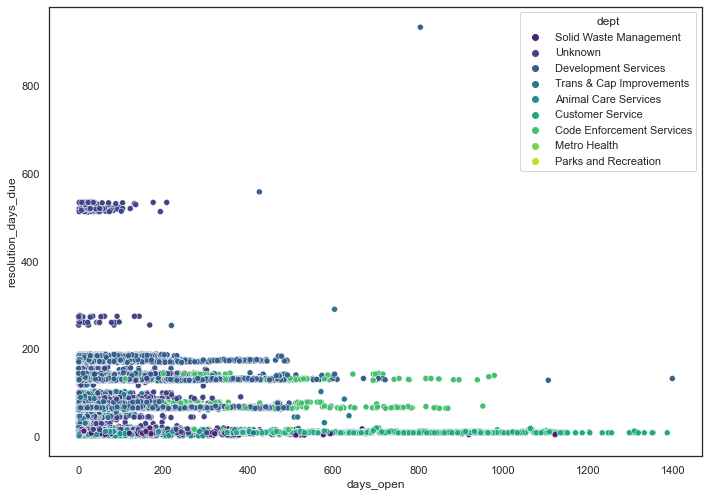

In [33]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='viridis',
                hue='dept')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

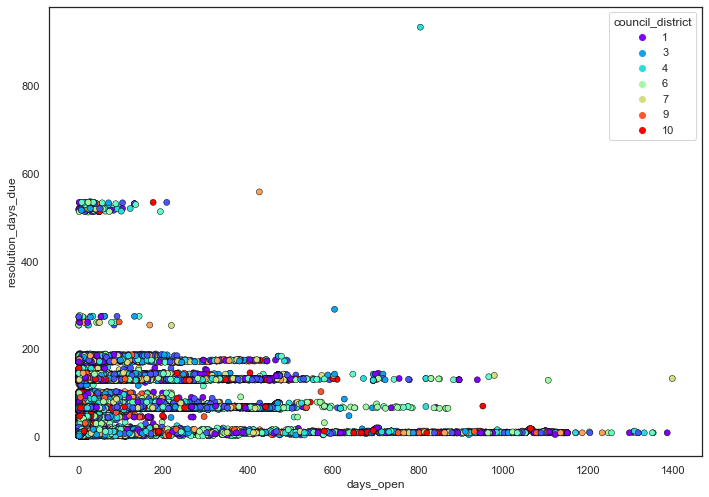

In [34]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='rainbow', edgecolor='black',
                hue='council_district')

## Takeaways:
- most early responses are calls about trades in unknown departments.

___

## How does the form of reporting affect delay level?

In [35]:
df.source_id.value_counts()

Web Portal                    287513
311 Mobile App                 38841
Constituent Call               30002
Internal Services Requests       448
Name: source_id, dtype: int64

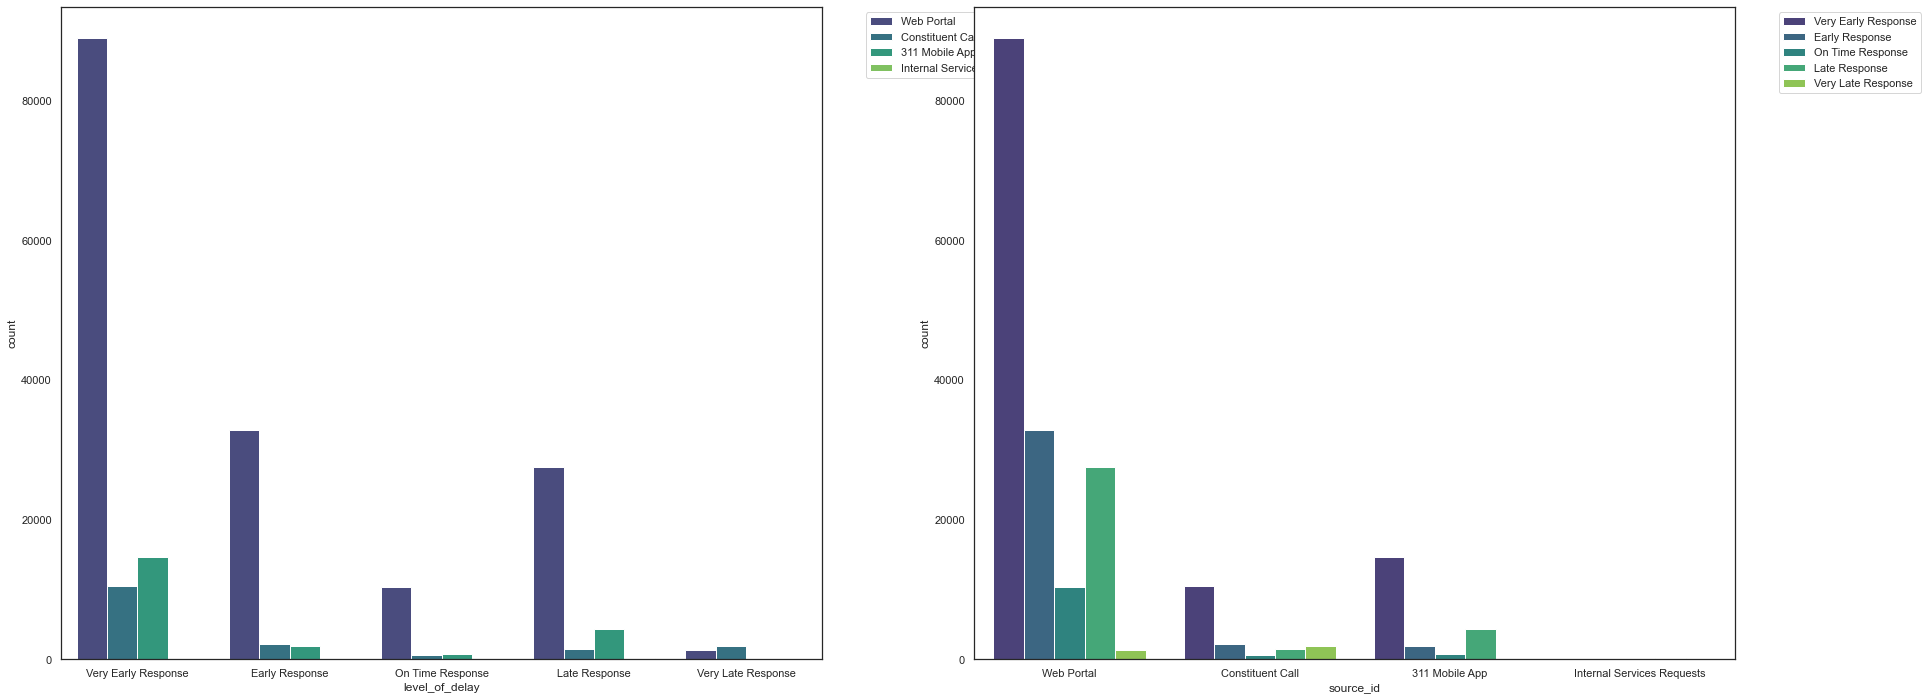

In [36]:
plt.subplots(1, 2, figsize=(30,12), sharey=True)
sns.set(style="white")

plt.subplot(1,2,1)
sns.countplot(data=train, hue='source_id', x='level_of_delay', palette = "viridis")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(1,2,2)
sns.countplot(data=train, x='source_id', hue='level_of_delay', palette = "viridis")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Text(0.5, 1.0, 'Delay level vs. resolution days due')

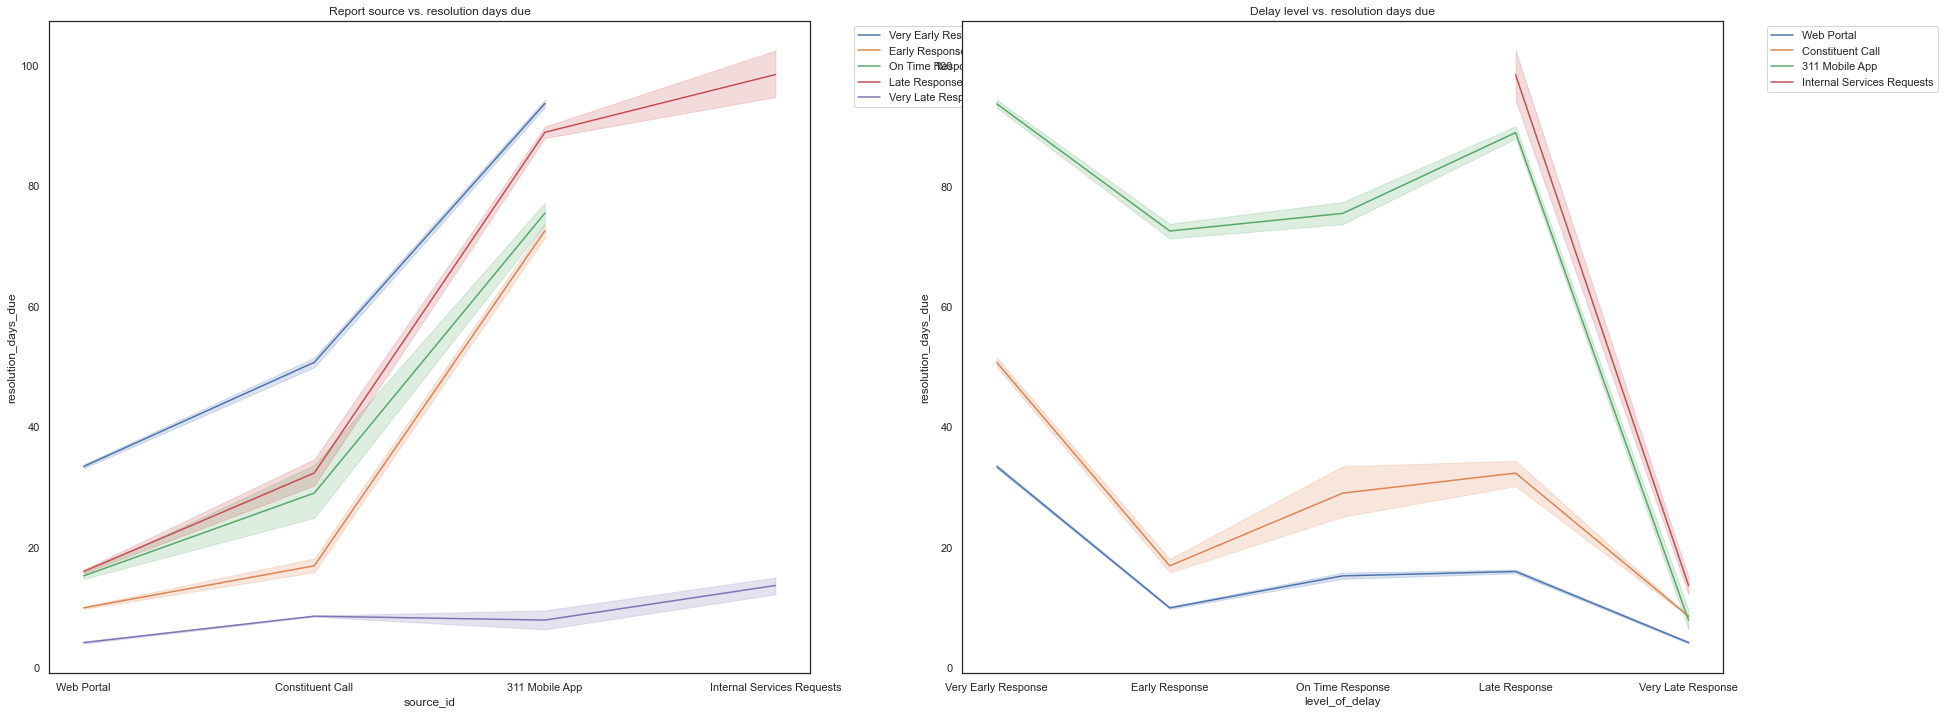

In [37]:
plt.subplots(1, 2, figsize=(30,12), sharey=True)
sns.set(style="white")

plt.subplot(1,2,1)
sns.lineplot(data=train, x="source_id", y="resolution_days_due", hue='level_of_delay')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Report source vs. resolution days due")

plt.subplot(1,2,2)
sns.lineplot(data=train, x="level_of_delay", y="resolution_days_due", hue='source_id')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. resolution days due")

## Takeaways:
- There seem to be a spike for Web Portal report from very early to early response times.

Text(0.5, 1.0, 'Delay level vs. resolution days due')

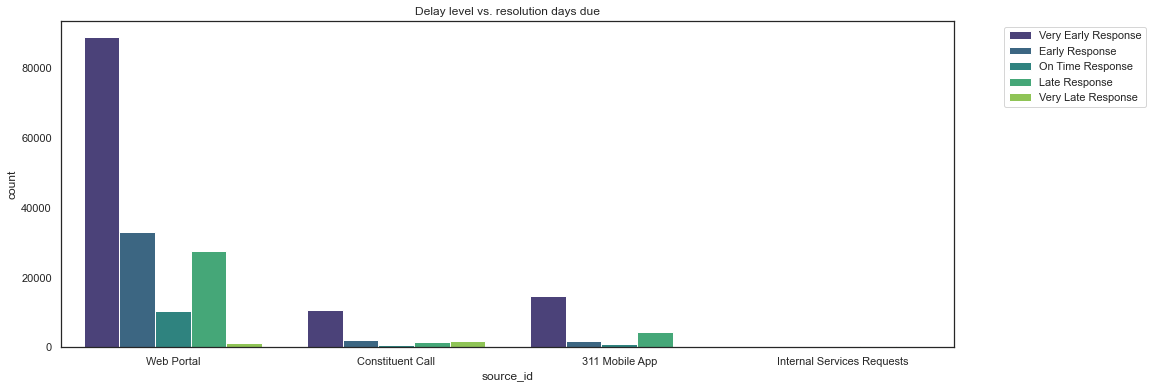

In [38]:
plt.figure(figsize=(16,6))
sns.countplot(data=train, hue="level_of_delay", x='source_id', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. resolution days due")

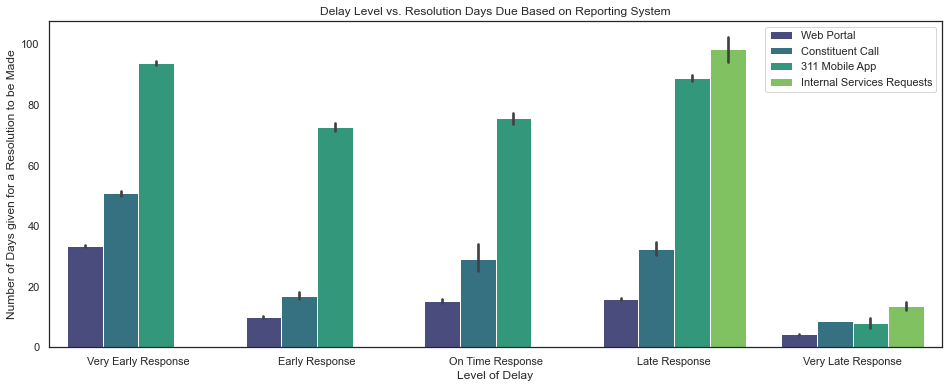

In [39]:
def plot_source_resolution_days(train):
    '''plots the level of delays based on the source of the report'''
    # set figure sizing
    plt.figure(figsize=(16,6))
    # make the plot
    sns.barplot(data=train, x="level_of_delay", y="resolution_days_due", hue='source_id', palette='viridis')
    # place the legend in desired location
    plt.legend(loc='upper right')
    # make the title
    plt.title("Delay Level vs. Resolution Days Due Based on Reporting System")
    # make the x label
    plt.xlabel('Level of Delay')
    # make the y label
    plt.ylabel('Number of Days given for a Resolution to be Made')
    # show just the plot
    plt.show()
    
plot_source_resolution_days(train)

## Takeaways:
- Internal services are only ever late, or very late.
    - We wonder why cases that were reported from a San Antonio employee are not taken care of similarly to those made by web portal, call, or through the mobile app?
    - Why are internal requests given so many days on average to be completed but are still being completed later than any other reporting system?
- Mobile app reports tend to have way more given days on average for a resolution to happen.
    - Why is it that reports over the mobile app are being given significantly more time on average to be resolved?

___

In [40]:
def plot_dept_resolution_days(train):
    '''plots the level of delays based on the source of the report'''
    # set figure sizing
    plt.figure(figsize=(16,6))
    # make the plot
    sns.barplot(data=train, x="level_of_delay", y="resolution_days_due", hue='dept', palette='viridis')
    # place the legend in desired location
    plt.legend(loc='upper right')
    # make the title
    plt.title("Delay Level vs. Resolution Days Due Based on Department")
    # make the x label
    plt.xlabel('Level of Delay')
    # make the y label
    plt.ylabel('Number of Days given for a Resolution to be Made')
    # show just the plot
    plt.show()
    
plot_dept_resolution_days(train):

SyntaxError: invalid syntax (<ipython-input-40-fa5cf87782b1>, line 18)

## Takeaways:
- Developmental Services and Code enforcement give significantly more time to complete a case on average when compared to other departments.
- Very late cases usually are being given a lot less time on average to be completed throughout each department.
- Solid waste management seems to be even distributed in average days given throughout each level of delay. 

___

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=train, x="level_of_delay", hue='dept', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Delay level vs. days open")

## Takeaways:
- 

# What depatments are being asigned most calls in each district?

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_1', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 1 makes up for 100% of the Park's and Recreation department calls
    - all of which are late response times

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_2', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Most of district 2's calls are handed off to code enforcement, and development
- District 2 is usually fairly distributed in delay levels
    - except tans & Cap imporivemnets has a spike in the late and so does customer care (suprising I know)

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_3', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Trans And Cap dept is also slacking in district 3
    - Makes up for ~ 29% of all of this departments extremely late responses

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_4', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 4's Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_5', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Code Enforcement department be working overtime
    - everything in this department is pretty high with the exceotio of on time responses, adnd extrememly early responses.

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_6', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- Developmental services have 100% of their extremely late repsonses come from district 6
- About 28% of the developmental sservices departments very late responses are in distric 6

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_7', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 7 tend to be responded to later rather than earlier accross all departments except solid waste, and metro health

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_8', hue='level_of_delay', data=train,
               palette='viridis')

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_9', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 9 has a spike in their extremely late repsonses from the Development services

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='dept', y='district_10', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways from all department district delays:
- More calls about waste, development, and animal services in district 0
    - but overall hardly any calls are happening in this district.
- District 1 makes up for 100% of the Park's and Recreation department calls
    - all of which are late response times
- Most of district 2's calls are handed off to code enforcement, and development
- District 2 is usually fairly distributed in delay levels
    - except tans & Cap imporivemnets has a spike in the late and so does customer care (suprising I know)
- Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Trans And Cap dept is also slacking in district 3
    - Makes up for ~ 29% of all of this departments extremely late responses
- District 4's Development Services Department Had been slacking
    - Makes up for ~31% of all of this departments extremely late responses
- Code Enforcement department be working  in District 5
    - everything in this department is pretty high with the exceotio of on time responses, adnd extrememly early responses.
- Code enforcement is high on both extremes in distrcit 6
- District 7 tend to be responded to later rather than earlier accross all departments except solid waste, and metro health
- District 9 has a spike in their extremely late repsonses from the Development services

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Department Delays in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='dept', data=train,
               palette='viridis')

# Call Reason Delays per District

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', data=train,
               palette='viridis')

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 1
    - 100% of trade calls extremely late response times are in district 1
    - about half of the very late traffic responses are in district 1
    - calls about buildings are usually responded to fairly quickly
    - For once customer services arent higher in late responses but rather have an overwhelming amount of on exrremely early
    - Clean up calls tend be very early or extremly early

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', data=train,
               palette='viridis')

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', hue='level_of_delay', data=train,
               palette='viridis')

## Takeaways:
- District 2
    - Building calls
        - holy extremely late responses batman
            - makes up for nearly 47% of all of the extremely late building related calls made in SA
    - DOesnt seem to have an overwhelmign amount of early calls in any department

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_3', data=train,
               palette='viridis')

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_3', hue='level_of_delay', data=train,
               palette='viridis')

In [ ]:
plt.subplots(3, 4, figsize=(60,24), sharey=True)
sns.set(style="white")

plt.subplot(3,4,1)
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_1', data=train,
               palette='viridis')

plt.subplot(3,4,2)
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_2', data=train,
               palette='viridis')

plt.subplot(3,4,3)
plt.title("Call Reason Delays in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_3', data=train,
               palette='viridis')

plt.subplot(3,4,4)
plt.title("Call Reason Delays in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_4', data=train,
               palette='viridis')

plt.subplot(3,4,5)
plt.title("Call Reason Delays in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_5', data=train,
               palette='viridis')

plt.subplot(3,4,6)
plt.title("Call Reason Delays in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_6', data=train,
               palette='viridis')

plt.subplot(3,4,7)
plt.title("Call Reason Delays in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_7', data=train,
               palette='viridis')

plt.subplot(3,4,8)
plt.title("Call Reason Delays in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_8', data=train,
               palette='viridis')

plt.subplot(3,4,9)
plt.title("Call Reason Delays in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_9', data=train,
               palette='viridis')

plt.subplot(3,4,10)
plt.title("Call Reason Delays in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='call_reason', y='district_10', data=train,
               palette='viridis')

plt.show()

In [ ]:
df.info()

___

In [ ]:
df.groupby(['level_of_delay'])['council_district'].transform('count')

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(hue='level_of_delay', x='district_1', data=train,
               palette='viridis')

### Takeaways:
- District 1
    - Has fairly decent respon

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_2', data=train,
               palette='viridis')

___

# Closer look at each Departments effect of the level of delay

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Animal Care Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='animal_care_services', data=train,
               palette='viridis')

### Takeaways
- Nearly 32% of all very late responses are from animal care services
- Nearly 28% of all late responses are from animal care services
- About 17% of all extremely early responses are from animal care services

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Code Enforcemment Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='code_enforcement_services', data=train,
               palette='viridis')

### Takeaways:
- A little less than 36% of all late responses are from code enforcement


In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Customer Service Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='customer_services', data=train,
               palette='viridis')

### Takeaways:
- ~ 80% of all extremely late responses are from customer service 
- about 40% of all very late responses are from customer service
- All the rest of the response level are basically non eistent in comparison to the late responses

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Development Service Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='development_services', data=train,
               palette='viridis')

### Takeaways:
- about 45% of all late responses are from Developemt services
- and about 32% of all extrememly early responses are from development services

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Metro Health Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='metro_health', data=train,
               palette='viridis')

### Takeaways:
- Metro health makes up for about 2% of all early responses
- Barely contributes to any form of late response times

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Parks and Rec Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='parks_and_rec', data=train,
               palette='viridis')

### Takeaways:
- Eaither extremely early or extremely late

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Waste Management Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='solid_waste_management', data=train,
               palette='viridis')

### Takeaways:
- Waste management makes up for nearly 65% of all verly early responses
- Makes up for about 61% of all on time responses
- Also make sup for nealry 52% of all early response
- Although wawter management does contribute to the late, very late, and extremely late response times. When compared to early we can see that this is a fairly successful department

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Trand & Cap Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='trans_and_cap_improvements', data=train,
               palette='viridis')

### Takeaways:
- trans and cap makes up for abut 40% of all early repsonses

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Call Reason Delays in Unknown Department", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='unknown_dept', data=train,
               palette='viridis')

### Takeaways:
- Unkown departments make up for about 8.3% of all early responses and 7% of all on time responses.
- Doest seem to contribute to extremely late responses all that much

___

# Closer look at the form of reportings effect on level of delay

In [ ]:
df.source_id.value_counts()

### Takeaways:
- Web Portal is the most common form of reporting
    - 311,634 cases reported this way out of 399,986 cases total
        - this means that 77.91% of cases are reported through web portal
- Moile app makes up 12.65% of case reporting
- Calls makes up for 8.62% of reporting
- 0.82% of cases re reported through internal sources

In [ ]:
plt.figure(figsize=(16,6))
plt.title("Delay Levels Accross Districts", size=20, color='black')
sns.countplot(x='level_of_delay', hue='source_id', data=train,
               palette='viridis')

In [ ]:
sns.barplot(data = train, x = 'resolution_days_due', y = 'days_open', hue = 'dept', row = 'dept', palette= 'Dark2')

In [ ]:
plot = sns.relplot(data = train, x = 'resolution_days_due', y = 'days_open', hue = 'dept', row = 'dept', palette= 'Dark2')
plot.set(ylim=(0, 100))
plot.set(xlim=(0, 100))

# Statistical Testing

## Council District

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.council_district, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The district and the level of delay are independent from each other"
alt_hypothesis = "The district and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


___

## Department

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.dept, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The department hadling a call and the level of delay are independent from each other"
alt_hypothesis = "The department and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


___

## Reason for Calling

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.call_reason, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The reason for the call and the level of delay are independent from each other"
alt_hypothesis = "The reason for calling and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


___

## Source ID

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.source_id, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The source of the report and the level of delay are independent from each other"
alt_hypothesis = "The source and the delay are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


___

## Income Per Capita

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.per_capita_income, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The income per capita and the level of delay are independent from each other"
alt_hypothesis = "The income per capita are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


___

## Voter turnout per district

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.voter_turnout_2019, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The voter turnout per district and the level of delay are independent from each other"
alt_hypothesis = "The voter turnout per district are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


___

## Month open

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.open_month, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The month a case was open and the level of delay are independent from each other"
alt_hypothesis = "The month a case was open amd delay level are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)

## week open

In [ ]:
# normlaize makes it percentage
observe = pd.crosstab(train.open_week, train.level_of_delay, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "The week a case was open and the level of delay are independent from each other"
alt_hypothesis = "The week a case was open amd delay level are dependent from one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("I reject the null hypothesis that: \n", null_hypothesis)
    print(' ')
    print("I move forward with my alternative hypothesis that \n", alt_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("I fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)

In [ ]:
df.info()